rasterio python quickstart
>reading and writing data files using rasterio
>
>use GeoTIFF format
>
>file is a worlclim imagery of kitui county in Geographic crs, i.e. WGS84

# Opening a dataset in reading mode

In [69]:
import rasterio
#open the file
#open() function takes a path string and returns an opened dataset
dataset=rasterio.open('data/reproj_temp_kitui.tif')

Dataset objects have some of the same attributes as Python file objects.

In [70]:
#check the name
dataset.name

'data/reproj_temp_kitui.tif'

In [71]:
#check the mode
dataset.mode

'r'

# Dataset Attributes
access prpoerties of raster data through attributes of opened dataset object

In [72]:
#check the band count
dataset.count

1

dataset objects have bands
>dataset band - an array of values that represent the patrial distribution of a single variable in 2D space
>
>all band arrays of a dataset have the same no of rows and columns.

In [73]:
#check the array width
dataset.width

8

In [74]:
#check array height
dataset.height

17

# Dataset Georeferencing
GIS raster datasets are mapped to regions on the earth's surface

our example covers the world from 37.667 to 39.0 degrees, left to right, and 3.0 to 0.1667 degrees bottom to top

In [75]:
#check the spatial bounding box for our dataset
dataset.bounds

BoundingBox(left=351523.5507, bottom=9668321.852, right=499079.0256, top=9981877.2361)

Geospatial transform
>a fundamental attribute 
> gives the value of bounds

In [76]:
dataset.transform

Affine(18444.434362499996, 0.0, 351523.5507,
       0.0, -18444.434358823495, 9981877.2361)

Dataset Transform
>an affine transformation matrix
>
>maps pixel locations in (row/col) coords to (x/y) spatial positions

In [77]:
#spatial position of upper left corner=matrix * (0,0)
dataset.transform *(0,0)

(351523.5507, 9981877.2361)

In [78]:
#spatial position of lower right corner = affine matrix * (width, height)
dataset.transform * (dataset.width, dataset.height)

(499079.0256, 9668321.852)

Dataset CRS
>gives the coordinates i.e the numbers 351523.5507 meters

In [79]:
dataset.crs

CRS.from_epsg(21037)

'EPSG 21037' 
>identifies a particular crs: UTM Zone 37S, which covers a part of the southern hemisphere, including parts of Africa and the Indian Ocean
>
>using the crs attribute and transform, the georeferencing of a raster dataset is described and a dataset can be compared to othe GIS datasets

# Reading raster data
using the band's index number, we can access data from a raster band

bands are indexed from 1, following the GDAL convention.

In [80]:
#check how many bands are in the dataset
dataset.indexes


(1,)

In [81]:
band1 = dataset.read(1)
band1

array([[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38,  1.7971500e+01,
         1.8388750e+01, -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38, -3.4000000e+38,  1.7146500e+01,  1.6984751e+01,
         1.7568501e+01,  1.8632750e+01, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38,  1.6778500e+01,  1.5796500e+01,  1.6490000e+01,
         1.7558250e+01,  1.8552500e+01, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38,  1.6758249e+01,  1.5932500e+01,  1.7106750e+01,
         1.7831249e+01,  1.8738251e+01,  1.9692751e+01, -3.4000000e+38],
       [-3.4000000e+38,  1.5766000e+01,  1.6094000e+01,  1.7356750e+01,
         1.8530001e+01,  1.9297251e+01,  2.0114250e+01, -3.4000000e+38],
       [-3.4000000e+38,  1.5123750e+01,  1.5751750e+01,  1.7250250e+01,
         1.8812250e+01,  1.9788500e+01,  2.0401251e+01,  2.1014750e+01],
       [ 1.5371250e+01,  1.5319250e+01,  1.6208000e+01,  1.8117250e+01,
         1.9103251e+01,  1.9799999e+01,  2.0625000e+01,  2

In [82]:
#access array values by their row, column index
band1[dataset.height// 2, dataset.width // 2]

np.float32(19.731)

# Spatial Indexing
> index() mtd - gets array indices corresponding to points in georeferenced space.
>
> objective 1: to get value for the pixel 20kms east and 100kms south of the dataset's upper left corner

In [83]:
x, y = (dataset.bounds.left + 20000, dataset.bounds.top - 100000)
row, col = dataset.index(x,y)
row, col

(5, 1)

In [84]:
band1[row, col]

np.float32(15.12375)

>objective 2: to get the spatial coordinates of a pixel.
>
>use - xy() mtd.

In [85]:
#compute the coordinates of the centre of the image 
dataset.xy(dataset.height//2, dataset.width//2)

(np.float64(434523.50533125), np.float64(9825099.54405))

# Data Creation

>objective: to write array values to a raster data file.
>
>use: rasterio dataset objects 
>
>benefit?? - shared with other applications. e.g. Q
>
>example -- consider an array of floating point values representing, e.g., a temperature or pressure anomaly field measured or modeled on a regular grid, 240 columns by 180 rows. The 1st and last grid points on the horizontal axis are located at 4.0 degrees west and 4.0 degrees east longitude, the 1st and last grid points on the vertical axis are located at 3 degrees south and 3 degrees north latitude.
>
>the fictional field in the example consists of the difference of 2 Gaussian distributions and is represented by 'array_of_interest'
>

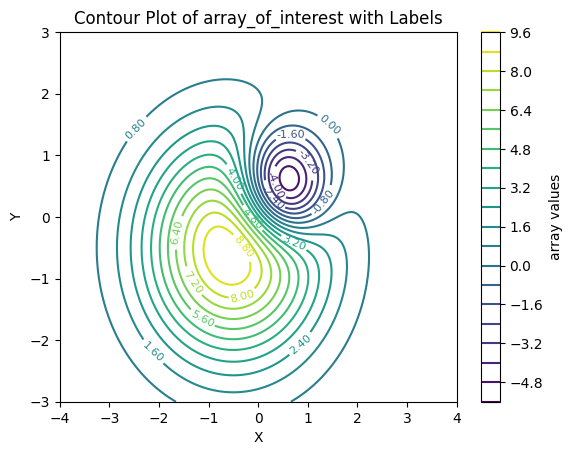

In [86]:
'''--------fictional field contours-------'''


import numpy as np
import matplotlib.pyplot as plt

# Your provided code
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
aoi1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
aoi2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
array_of_interest = 10.0 * (aoi2 - aoi1)

# Create a contour plot using Matplotlib
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')

# Add labels to the contour lines
plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

# Add title and axis labels
plt.title('Contour Plot of array_of_interest with Labels')
plt.xlabel('X')
plt.ylabel('Y')

# Add a color bar
plt.colorbar(label='array values')

# Show the plot
plt.show()


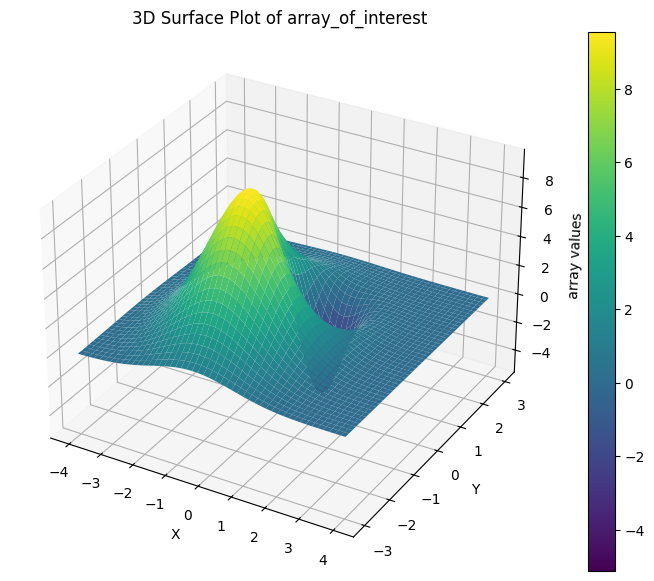

In [87]:
'''-----fictional field 3d surface plot-----'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your provided code
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
aoi1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
aoi2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
array_of_interest = 10.0 * (aoi2 - aoi1)

# Plot the 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, array_of_interest, cmap='viridis')
fig.colorbar(surf)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("array values")
ax.set_title("3D Surface Plot of array_of_interest")
plt.show()


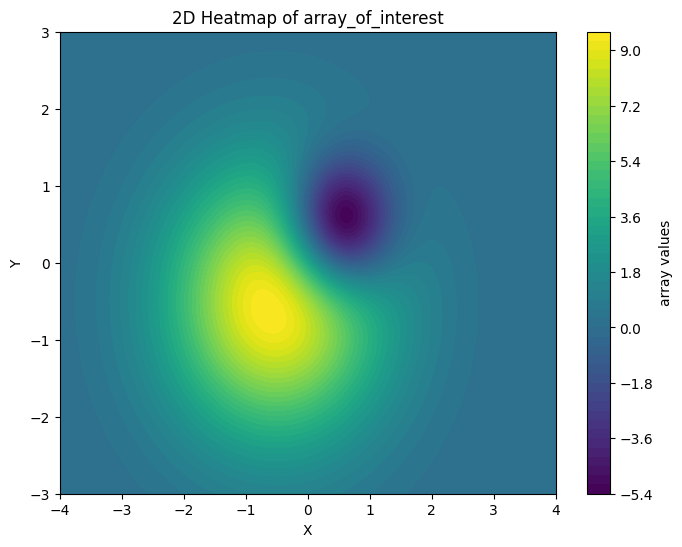

In [88]:
'''-----fictional field 2d surface plot-----'''

import numpy as np
import matplotlib.pyplot as plt

# Your provided code
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
aoi1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
aoi2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
array_of_interest = 10.0 * (aoi2 - aoi1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, array_of_interest, levels=50, cmap='viridis')
plt.colorbar(label="array values")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Heatmap of array_of_interest")
plt.show()


# Opening a Dataset in writing Mode

objective: to save this array along with georeferencing information to a new raster data file

use rasterio.open() mtd - params; path/to/new/file , 'w' (specifys writing mode)

keyword arguments

>_driver:_ name of desired format driver - required
>
>_width:_ number of dataset columns - required
>
>_height:_ number of dataset rows - required
>
>_count:_ a count of dataset bands - required
>
>_dtype:_ dataset datatype - required
>
>_crs:_ a crs identifier/description - optional
>
>_transfrom:_ an affine transformation matrix - optional
>
>_nodata:_ a 'nodata' value - optional 

for this example:
crs = '+proj=latlong' - an equirectangular crs; units - decimal degrees

In [89]:
#affine transform = translation * scaling
from rasterio.transform import Affine
res=(x[-1] - x[0])/240.0
transform=Affine.translation(x[0] - res/2, y[0] -res/2)* Affine.scale(res, res)
transform

Affine(np.float64(0.03333333333333333), np.float64(0.0), np.float64(-4.016666666666667),
       np.float64(0.0), np.float64(0.03333333333333333), np.float64(-3.0166666666666666))

In [90]:
#check the data folder to see new file
new_dataset = rasterio.open(
    'data/new.tif1',
    'w',
    driver='GTiff',
    height=array_of_interest.shape[0],
    width=array_of_interest.shape[1],
    count=1,
    dtype=array_of_interest.dtype,
    crs='+proj=latlong',
    transform=transform,
)

# Saving raster data

>objective: copy the grid to the opened dataset
>
>use - write() mtd -
>
>arguments: the grid, target band number
>
>close() mtd - to sync data to disk and finish
>
>check the data directory for output

In [91]:
new_dataset.write(array_of_interest, 1)
new_dataset.close()